# Task 3 - 29 May 2025


# **Linear Regression**

### *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### *Loading & Preprocessing the Dataset*

In [6]:
df = pd.read_csv("Housing.csv")

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### *Preprocessing*

In [8]:
print(df.isnull().sum())


df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})


df.drop_duplicates(inplace=True)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### *Split Data into Train-Test*

In [9]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### *Training Linear Regression Model*

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### *Evaluating the Model*

In [13]:
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1127483.35
MSE: 2292721545725.36
R² Score: 0.55


### *Visualizing Predictions vs Actual*

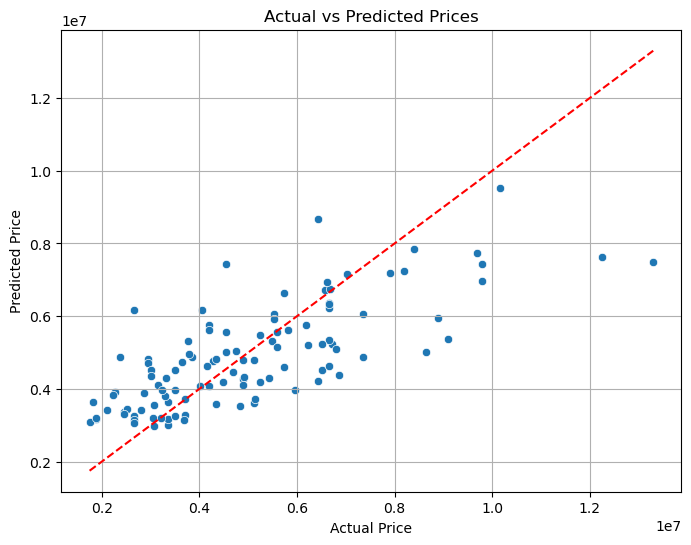

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # y = x line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()



### *Printing Coefficients and Interpret*

In [16]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)


     Feature   Coefficient
0       area  3.088670e+02
1   bedrooms  1.512468e+05
2  bathrooms  1.185732e+06
3    stories  4.951008e+05
4    parking  3.376608e+05
